In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt

/scratch/gpfs/wz1411/miniconda3/envs/vcmsa_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

In [4]:
dataset = 'CBS'

result_folder_path = 'results_' + dataset
sp_path = result_folder_path + '/all_sp_results.txt'
tc_path = result_folder_path + '/all_tc_results.txt'

layer_names = []
sp_results = []
tc_results = []

# Open the text file and process it
with open(sp_path, 'r') as f:
    for line in f:
        # Split each line into the layer name and its result
        layer_name, result = line.strip().split(':')
        layer_names.append(layer_name.strip()[5:])
        sp_results.append(float(result.strip()))

# Open the text file and process it
with open(tc_path, 'r') as f:
    for line in f:
        # Split each line into the layer name and its result
        layer_name, result = line.strip().split(':')
        tc_results.append(float(result.strip()))

# Print to verify results
print("Layer Names:", layer_names)
print("SP Results:", sp_results)
print("TC Results:", tc_results)

sp_layer_all = sp_results[0]
tc_layer_all = tc_results[0]

layer_names = layer_names[1:]
sp_results = sp_results[1:]
tc_results = tc_results[1:]

print("SP Layer All:", sp_layer_all)
print("TC Layer All:", tc_layer_all)

sp_results_prop = [sp / sp_layer_all for sp in sp_results]
tc_results_prop = [tc / tc_layer_all for tc in tc_results]

print("SP Results Prop:", sp_results_prop)
print("TC Results Prop:", tc_results_prop)


Layer Names: ['-all', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '-10', '-11', '-12', '-13', '-14', '-15', '-16']
SP Results: [61.9, 38.1, 40.7, 62.7, 50.8, 56.8, 39.8, 40.7, 61.9, 46.6, 41.5, 45.8, 49.2, 30.5, 31.4, 28.8, 40.7]
TC Results: [33.3, 16.7, 14.8, 37.0, 37.0, 31.5, 11.1, 13.0, 37.0, 18.5, 11.1, 22.2, 16.7, 24.1, 7.4, 18.5, 20.4]
SP Layer All: 61.9
TC Layer All: 33.3
SP Results Prop: [0.6155088852988692, 0.6575121163166397, 1.012924071082391, 0.8206785137318255, 0.9176090468497576, 0.6429725363489499, 0.6575121163166397, 1.0, 0.752827140549273, 0.6704361873990307, 0.739903069466882, 0.7948303715670437, 0.4927302100161551, 0.5072697899838449, 0.46526655896607433, 0.6575121163166397]
TC Results Prop: [0.5015015015015015, 0.44444444444444453, 1.1111111111111112, 1.1111111111111112, 0.945945945945946, 0.33333333333333337, 0.3903903903903904, 1.1111111111111112, 0.5555555555555556, 0.33333333333333337, 0.6666666666666667, 0.5015015015015015, 0.7237237237237238, 0.22222

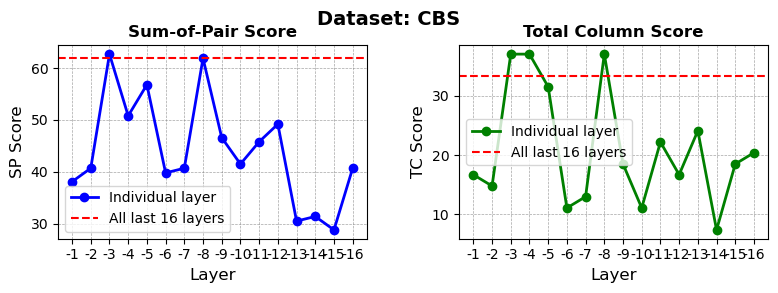

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns, larger figure

# SP plot
axes[0].plot(layer_names, sp_results, marker='o', linestyle='-', linewidth=2, color='blue', label='Individual layer')
axes[0].axhline(y=sp_layer_all, color='red', linestyle='--', linewidth=1.5, label='All last 16 layers')
axes[0].set_title('Sum-of-Pair Score', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Layer', fontsize=12)
axes[0].set_ylabel('SP Score', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
axes[0].legend(fontsize=10, loc='best')

# TC plot
axes[1].plot(layer_names, tc_results, marker='o', linestyle='-', linewidth=2, color='green', label='Individual layer')
axes[1].axhline(y=tc_layer_all, color='red', linestyle='--', linewidth=1.5, label='All last 16 layers')
axes[1].set_title('Total Column Score', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Layer', fontsize=12)
axes[1].set_ylabel('TC Score', fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
axes[1].legend(fontsize=10, loc='best')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between plots

# Add overall title
fig.suptitle('Dataset: ' + dataset, fontsize=14, fontweight='bold')

# Show plot
plt.show()

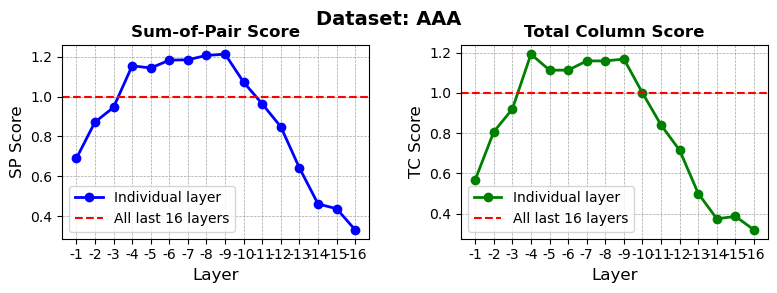

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns, larger figure

# SP plot
axes[0].plot(layer_names, sp_results_prop, marker='o', linestyle='-', linewidth=2, color='blue', label='Individual layer')
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='All last 16 layers')
axes[0].set_title('Sum-of-Pair Score', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Layer', fontsize=12)
axes[0].set_ylabel('SP Score', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
axes[0].legend(fontsize=10, loc='best')

# TC plot
axes[1].plot(layer_names, tc_results_prop, marker='o', linestyle='-', linewidth=2, color='green', label='Individual layer')
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='All last 16 layers')
axes[1].set_title('Total Column Score', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Layer', fontsize=12)
axes[1].set_ylabel('TC Score', fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
axes[1].legend(fontsize=10, loc='best')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between plots

# Add overall title
fig.suptitle('Dataset: ' + dataset, fontsize=14, fontweight='bold')

# Show plot
plt.show()

In [110]:
import glob
import os

input_directory = "../../data/Fasta/*.fasta"  #####################################################

dataset_list = []
for input_fasta in glob.glob(input_directory):
    dataset = os.path.splitext(os.path.basename(input_fasta))[0]
    dataset_list.append(dataset)

print(dataset_list)

['Ribosomal_L1', 'TyrKc', 'MCR_alpha', 'LIM', 'sh3', 'CUB', 'CH', 'transketolase_C', 'PGAM', 'biotin_lipoyl', 'ghf5', 'Phage_integrase', 'oat', 'serbact', 'cytc', 'Sulfotransfer', 'Peptidase_M24', 'icd', 'Cu_nir', 'dsrm', 'ung', 'DAHP_synth_1', 'GATase', 'cat', 'aldosered', 'COX3', 'ccH', 'FAD-oxidase_C', 'histone', 'AAA', 'Extradiol_dioxy', 'ghf1', 'UPF0076', 'HMA', 'Lum_binding', 'flav', 'tRNA-synt_1', 'gtp', 'RuBisCO_large', 'Asp_Glu_race_D', 'aldedh', 'csp', 'response_reg', 'tim', 'ghf18', 'citrate_synt', 'asp', 'ligase-CoA', 'HLH', 'aabp', 'MoCF_biosynth', 'CBS', 'zf-CCHH', 'subt', 'TIG', 'kunitz', 'Mur_ligase_C', 'phs', 'lacI', 'LMWPc', 'Toprim', 'ARM', 'NTP_transferase', 'sermam', 'Filamin', 'RuBisCO_large_N', 'Glyco_hydro_2', 'rnh', 'HGTP_anticodon', 'cys', 'bac_luciferase', 'ech', 'sh2', 'Nitroreductase', 'Orn_DAP_Arg_deC', 'Glyco_hydro_18_D2', 'uce', 'hla', 'DHOdehase', 'ghf34', 'PDZ', 'inositol_P', 'fer2', 'GAF', 'AhpC-TSA', 'ACPS', 'prt', 'PEP-utilizers', 'dCMP_cyt_deam', '

In [120]:
sp_results_prop_list = []
tc_results_prop_list = []

for dataset in dataset_list:

    result_folder_path = 'results_' + dataset
    sp_path = result_folder_path + '/all_sp_results.txt'
    tc_path = result_folder_path + '/all_tc_results.txt'

    layer_names = []
    sp_results = []
    tc_results = []

    # Open the text file and process it
    with open(sp_path, 'r') as f:
        for line in f:
            # Split each line into the layer name and its result
            layer_name, result = line.strip().split(':')
            layer_names.append(layer_name.strip()[5:])
            sp_results.append(float(result.strip()))

    # Open the text file and process it
    with open(tc_path, 'r') as f:
        for line in f:
            # Split each line into the layer name and its result
            layer_name, result = line.strip().split(':')
            tc_results.append(float(result.strip()))

    sp_layer_all = sp_results[0]
    tc_layer_all = tc_results[0]

    layer_names = layer_names[1:]
    sp_results = sp_results[1:]
    tc_results = tc_results[1:]

    sp_results_prop = [sp / sp_layer_all for sp in sp_results]
    tc_results_prop = [tc / tc_layer_all for tc in tc_results]

    # check if the prop is larger than 100
    flag = False
    for i in range(len(tc_results_prop)):
        if tc_results_prop[i] > 2.5:
            print("SP", dataset, layer_names[i], tc_results_prop[i], tc_results[i], tc_layer_all)
            flag = True

    if flag:
        continue

    sp_results_prop_list.append(sp_results_prop)
    tc_results_prop_list.append(tc_results_prop)

print(sp_results_prop_list)
print(tc_results_prop_list)

SP Glyco_hydro_18_D1 -1 135.16666666666666 81.1 0.6
SP Glyco_hydro_18_D1 -2 134.00000000000003 80.4 0.6
SP Glyco_hydro_18_D1 -3 137.33333333333334 82.4 0.6
SP Glyco_hydro_18_D1 -4 137.83333333333334 82.7 0.6
SP Glyco_hydro_18_D1 -5 135.16666666666666 81.1 0.6
SP Glyco_hydro_18_D1 -6 126.66666666666667 76.0 0.6
SP Glyco_hydro_18_D1 -7 128.16666666666669 76.9 0.6
SP Glyco_hydro_18_D1 -8 121.83333333333333 73.1 0.6
SP Glyco_hydro_18_D1 -9 104.66666666666667 62.8 0.6
SP Glyco_hydro_18_D1 -10 110.5 66.3 0.6
SP Glyco_hydro_18_D1 -11 98.33333333333334 59.0 0.6
SP Glyco_hydro_18_D1 -12 97.83333333333334 58.7 0.6
SP Glyco_hydro_18_D1 -13 79.0 47.4 0.6
SP Glyco_hydro_18_D1 -14 68.83333333333333 41.3 0.6
SP Glyco_hydro_18_D1 -15 49.66666666666667 29.8 0.6
SP Glyco_hydro_18_D1 -16 33.666666666666664 20.2 0.6
SP LRR -2 2.898305084745763 17.1 5.9
SP LRR -3 2.898305084745763 17.1 5.9
SP LRR -5 2.932203389830508 17.3 5.9
SP LRR -9 3.0508474576271185 18.0 5.9
SP LRR -12 3.6101694915254234 21.3 5.9
SP L

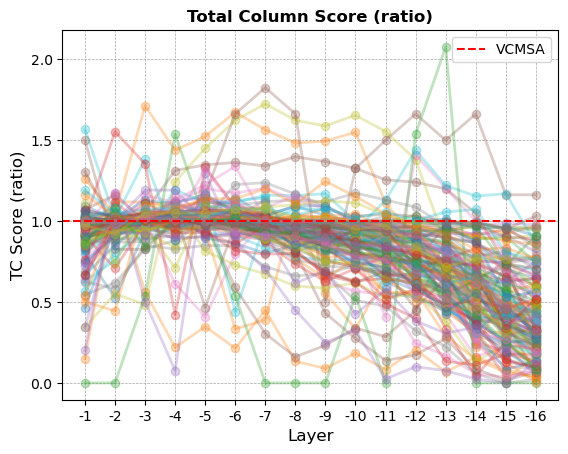

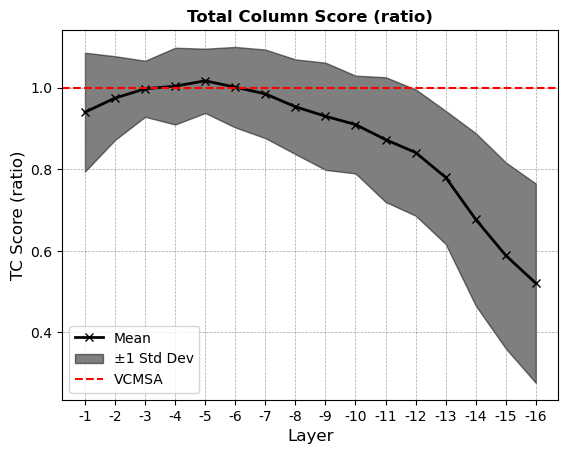

In [126]:
for i in range(len(tc_results_prop_list)):

    plt.plot(layer_names, tc_results_prop_list[i], marker='o', linestyle='-', linewidth=2, alpha=0.3)

# Compute the mean SP score across datasets for each layer
overall_trend = np.mean(sp_results_prop_list, axis=0)
std_dev = np.std(sp_results_prop_list, axis=0)

# plt.plot(layer_names, overall_trend, marker='x', linestyle='-', linewidth=2, color='black', label='Overall Trend')
# plt.fill_between(
#     layer_names,
#     overall_trend - std_dev,
#     overall_trend + std_dev,
#     color='black',
#     alpha=0.6,  # Transparency for the shadow
#     label='±1 Std Dev'
# )

plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='VCMSA')
plt.title('Total Column Score (ratio)', fontsize=12, fontweight='bold')
plt.xlabel('Layer', fontsize=12)
plt.ylabel('TC Score (ratio)', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
plt.legend(fontsize=10, loc='best')
plt.show()


plt.plot(layer_names, overall_trend, marker='x', linestyle='-', linewidth=2, color='black', label='Mean')
plt.fill_between(
    layer_names,
    overall_trend - std_dev,
    overall_trend + std_dev,
    color='black',
    alpha=0.5,  # Transparency for the shadow
    label='±1 Std Dev'
)

plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='VCMSA')
plt.title('Total Column Score (ratio)', fontsize=12, fontweight='bold')
plt.xlabel('Layer', fontsize=12)
plt.ylabel('TC Score (ratio)', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
plt.legend(fontsize=10, loc='best')
plt.show()